In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("iris.data.csv", names=['sepal length in cm',
                                           'sepal width in cm',
                                           'petal length in cm',
                                            'petal width in cm',
                                            'class'])

In [6]:
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
print(np.unique(data['class']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['class'] = lb.fit_transform(data['class'])

In [12]:
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
train_data = data.drop(['class'], axis=1)
target_data = data['class']

In [53]:
train_data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
target_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [16]:
print(train_data.shape)
print(target_data.shape)

(150, 4)
(150,)


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.15, random_state=1)

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [169]:
model = Sequential([
    Dense(128, activation='relu', input_shape=[4]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_65 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_67 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 17        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [171]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 0s 37ms/step - loss: 0.7536 - accuracy: 0.3071 - val_loss: 0.4162 - val_accuracy: 0.4783
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6448 - accuracy: 0.3071 - val_loss: 0.4019 - val_accuracy: 0.4783
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6085 - accuracy: 0.3071 - val_loss: 0.3988 - val_accuracy: 0.4783
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5898 - accuracy: 0.3071 - val_loss: 0.3782 - val_accuracy: 0.4783
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5656 - accuracy: 0.3071 - val_loss: 0.3414 - val_accuracy: 0.4783
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.3071 - val_loss: 0.3096 - val_accuracy: 0.4783
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5072 - accuracy: 0.3071 - val_loss: 0.2936 - val_accuracy: 0.4783
Epoch 8/100
4/4 [=========

In [172]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [173]:
import matplotlib.pyplot as plt

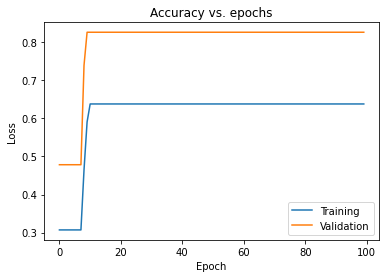

In [174]:
# Run this cell to plot the epoch vs accuracy graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

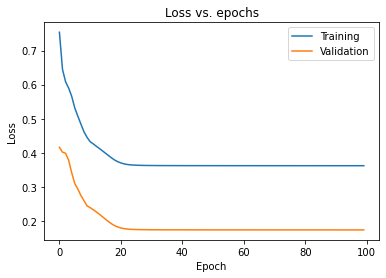

In [175]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

In [177]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=90,
                               random_state=1)
score = cross_val_score(clf, train_data, target_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
round(np.mean(score)*100, 2)

[1.         0.93333333 0.93333333 1.         0.93333333 0.93333333
 1.         0.86666667 1.         0.8       ]


94.0

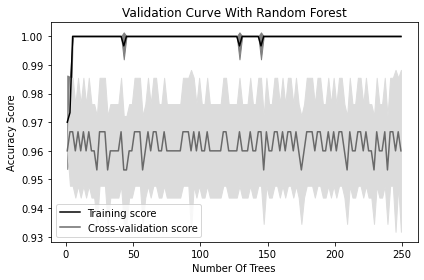

In [179]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             train_data, 
                                             target_data, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()